In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
np.random.seed(42)

import seaborn as sns
sns.set()

# Verimizi uretelim

`X` 
 - Ogrencilerin Vize ve Final notlari
 
`w`, `b` 
 - parametreler w = [0.5 0.5].T ve b = 10
 
Tahmin edilmek istenen `y`
 - `0.5 vize + 0.5 Final + 10 > 50` ise ogrenci geciyor, `y = True`

In [2]:
def veriUret(d = 2, n = 100):
    """
    y = W.T X + b > 0.5 
    
    Parameters:
    ------------
        d : Oznitelik sayisi
        n : Ornek Sayisi
        
    Returns:
    -----------
        X    : Rastgele Uretilmis [d: Oznitelik sayisi, n: Ornek Sayisi] boyutlu matris
        y    : W.T X + b > 50 [1, n: Ornek Sayisi]]
        veri : X.T ve y.T iceren matris
    """
    
    
    w_gizli = np.ones((d,1)) * 0.5 # Boyut: [d: Oznitelik sayisi, 1]
    b_gizli = 10 # Boyut: [1, 1]
    
    X = np.random.randint(0,100, size = (d,n))
    h = np.dot(w_gizli.T, X) + b_gizli
    y = 1 * (h > 50)

    oznitelik_isimleri = ['not'+str(i) for i in range(d)] + ['y']
    veri = pd.DataFrame(data = np.concatenate((X,y)).T, columns  = oznitelik_isimleri)
    return X, y, veri

In [3]:
X, y, veri = veriUret(d = 2, n = 7)

In [4]:
X

array([[51, 92, 14, 71, 60, 20, 82],
       [86, 74, 74, 87, 99, 23,  2]])

In [5]:
y

array([[1, 1, 1, 1, 1, 0, 1]])

In [6]:
veri

,not0,not1,y
0,51,86,1
1,92,74,1
2,14,74,1
3,71,87,1
4,60,99,1
5,20,23,0
6,82,2,1


In [16]:
X, y, veri = veriUret(d = 2, n = 100)

In [17]:
X.shape, y.shape

((2, 100), (1, 100))

In [18]:
veri.head()

,not0,not1,y
0,85,37,1
1,12,5,0
2,58,57,1
3,18,43,0
4,48,44,1


In [20]:
#veri.y

## Veriyi Cizelim

Text(13.125, 0.5, 'Final')

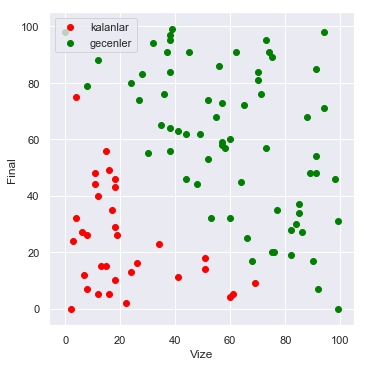

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(veri[veri.y == 0].not0, veri[veri.y == 0].not1, c = "red", label = "kalanlar")
plt.scatter(veri[veri.y == 1].not0, veri[veri.y == 1].not1, c = "green", label = "gecenler")
##
##
plt.legend()
plt.tight_layout()
plt.xlabel("Vize")
plt.ylabel("Final")

## Veriyi normalize edelim

In [34]:
veri.head()

,not0,not1,y
0,85,37,1
1,12,5,0
2,58,57,1
3,18,43,0
4,48,44,1


In [36]:
veri.min(axis = 0)

not0    0
not1    0
y       0
dtype: int64

In [38]:
veri.max(axis = 0)

not0    99
not1    99
y        1
dtype: int64

In [39]:
mini = veri.min(axis = 0)
maxi = veri.max(axis = 0)

veri_normal = (veri - mini) / (maxi - mini)
veri_normal.head()

,not0,not1,y
0,0.858586,0.373737,1.0
1,0.121212,0.050505,0.0
2,0.585859,0.575758,1.0
3,0.181818,0.434343,0.0
4,0.484848,0.444444,1.0


In [40]:
veri.head()

,not0,not1,y
0,85,37,1
1,12,5,0
2,58,57,1
3,18,43,0
4,48,44,1


# Cross Entropy Loss Function

In [43]:
def cross_entropy_loss(h,y):
    return - (y* np.log(h) + (1 - y) * (np.log(1 - h)))

In [44]:
h = np.linspace(0,1, 100)
h = h [1:-1]
h

array([0.01010101, 0.02020202, 0.03030303, 0.04040404, 0.05050505,
       0.06060606, 0.07070707, 0.08080808, 0.09090909, 0.1010101 ,
       0.11111111, 0.12121212, 0.13131313, 0.14141414, 0.15151515,
       0.16161616, 0.17171717, 0.18181818, 0.19191919, 0.2020202 ,
       0.21212121, 0.22222222, 0.23232323, 0.24242424, 0.25252525,
       0.26262626, 0.27272727, 0.28282828, 0.29292929, 0.3030303 ,
       0.31313131, 0.32323232, 0.33333333, 0.34343434, 0.35353535,
       0.36363636, 0.37373737, 0.38383838, 0.39393939, 0.4040404 ,
       0.41414141, 0.42424242, 0.43434343, 0.44444444, 0.45454545,
       0.46464646, 0.47474747, 0.48484848, 0.49494949, 0.50505051,
       0.51515152, 0.52525253, 0.53535354, 0.54545455, 0.55555556,
       0.56565657, 0.57575758, 0.58585859, 0.5959596 , 0.60606061,
       0.61616162, 0.62626263, 0.63636364, 0.64646465, 0.65656566,
       0.66666667, 0.67676768, 0.68686869, 0.6969697 , 0.70707071,
       0.71717172, 0.72727273, 0.73737374, 0.74747475, 0.75757

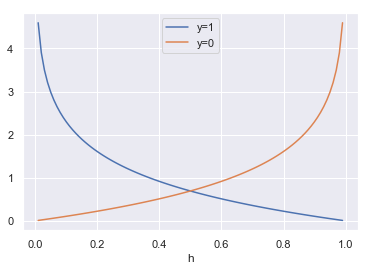

In [46]:
y = 1
cost1 =  - y * np.log(h)
plt.plot(h, cost1, label = "y=1")
y = 0
cost0 =  - (1 - y) * np.log(1 - h)
plt.plot(h, cost0, label = "y=0")
plt.xlabel('h')
plt.legend()

In [91]:
cross_entropy_loss(h = 0.2, y = 0)

0.2231435513142097

In [92]:
cross_entropy_loss(h = 0.2, y = 1)

1.6094379124341003

In [47]:
cross_entropy_loss(h = np.array([0.2, 0.2]), y = np.array([0, 1]))

array([0.22314355, 1.60943791])

# Logistic Regression Sinifini yazalim

In [71]:
class Classo():
    def __init__(self, X, y, alpha =  0.0001, iterasyon = 1000):
        self.X = X
        self.y = y
        
        self.d = self.X.shape[0] # oznitelik sayisi
        self.n = self.X.shape[1] # ornek sayisi
        
        self.alpha = alpha
        self.iterasyon = iterasyon
        
        self.w  = np.random.rand(self.d,1) # rastgele d agirlik parametre degeri
        self.b = np.random.rand()  # ratgeele 1 bias paarmetre degeri
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cross_entropy_loss(self, h,y):
        return - (y* np.log(h) + (1 - y) * (np.log(1 - h)))

    def fit(self):
        self.Js = [] 

        for i in range(self.iterasyon):
            # ileri yayilim
            z = np.dot(self.w.T, self.X) + self.b
            h = self.sigmoid(z)
            # geri yayilim
            dw = (1 / self.n) * np.dot(self.X, (h-self.y).T)
            db = (1 / self.n) * np.sum(h-self.y)
            # Egim Inis
            self.w = self.w - self.alpha * dw
            self.b = self.b - self.alpha * db
            
            if i%100:
                cost = self.cross_entropy_loss(h, self.y)
                self.Js.append(cost)
                
    def predict(self, X_test):
        z = np.dot(self.w.T, X_test) + b
        h = self.sigmoid(z)
        
        return 1 * (h > 0.5)
        

In [89]:
class Classo():
    def __init__(self, X, y, alpha =  0.0001, iterasyon = 1000):
        self.X = X
        self.y = y
        
        self.d = self.X.shape[0] # oznitelik sayisi
        self.n = self.X.shape[1] # ornek sayisi
        
        self.alpha = alpha
        self.iterasyon = iterasyon
        
        self.w  = np.random.rand(self.d,1) # rastgele d agirlik parametre degeri
        self.b = np.random.rand()  # ratgeele 1 bias paarmetre degeri
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cross_entropy_loss(self, h,y):
        return - (y* np.log(h) + (1 - y) * (np.log(1 - h)))

    def fit(self):
        self.Js = [] 

        for i in range(self.iterasyon):
            # ileri yayilim
            z = np.dot(self.w.T, self.X) + self.b
            h = self.sigmoid(z)
            # geri yayilim
            dw = (1 / self.n) * np.dot(self.X, (h-self.y).T)
            db = (1 / self.n) * np.sum(h-self.y)
            # Egim Inis
            self.w = self.w - self.alpha * dw
            self.b = self.b - self.alpha * db
            
            if i%100:
                cost = self.cross_entropy_loss(h, self.y)
                self.Js.append(np.sum(cost))
                
    def predict(self, X_test):
        z = np.dot(self.w.T, X_test) + self.b
        h = self.sigmoid(z)
        
        return 1 * (h > 0.5)
        

# Logistic Regression Egitelim

In [82]:
# Normalize edilen veriye ihtiyac var
X = veri_normal.iloc[:, :-1].values.T
y = veri_normal.iloc[:, -1:].values.T

cls = Classo(X, y , alpha =  0.0001, iterasyon = 10)
cls.fit()

In [83]:
print("Buldugumuz parametre degerleri")
print("\tw = {}.T".format(cls.w.T))
print("\tb = {}".format(cls.b))

Buldugumuz parametre degerleri
	w = [[0.7414604  0.57314537]].T
	b = 0.9975294811601852


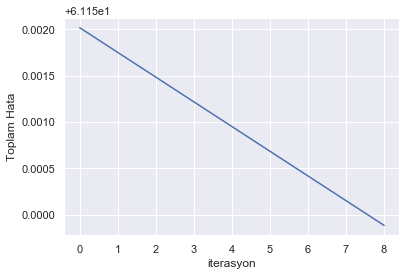

In [84]:
plt.plot(cls.Js)
plt.xlabel('iterasyon'); plt.ylabel('Toplam Hata'); 

In [85]:
h = cls.predict(X)
h

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [86]:
y

array([[1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
        1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
        1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
        1., 1., 1., 1.]])

In [87]:
h.shape, y.shape

((1, 100), (1, 100))

In [88]:
np.sum(h == y)

67

# Test verisinde degerlendirme

In [103]:
X_test, y_test, veri_test = veriUret(d = 2, n = 100)

### Veriyi normalize et
 > traindeki min ve max degerleri kullaniliyor

In [104]:
veri_test_normal = None
veri_test_normal.head()

,not0,not1,y
0,0.595960,0.479592,1.0
1,0.060606,0.857143,1.0
2,0.565657,0.387755,1.0
3,0.353535,1.010204,1.0
4,0.444444,0.326531,0.0


In [105]:
veri_test.head()

,not0,not1,y
0,59,47,1
1,6,84,1
2,56,38,1
3,35,99,1
4,44,32,0


In [106]:
X_test = None
y = None

h = cls.predict(X_test)
h

array([[1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]])

In [107]:
y

array([[1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
        1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
        1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 0., 1., 1.]])

In [108]:
## Basari
np.sum(y == h) /len(y)

98.0

# Basit Gercek Veri

In [109]:
from sklearn import datasets
iris = datasets.load_iris()

X, y = iris.data, iris.target
# 2 sinif olsun
X, y = X[y < 2], y [y<2]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

cls = Classo(X_train.T, y_train , alpha =  0.01, iterasyon = 100000)
cls.fit()
h = cls.predict(X_test.T)

In [110]:
h == y_test

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True]])

In [118]:
y_test

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [120]:
h[0]

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, h[0])

array([[19,  0],
       [ 0, 14]])